## Astro 78100

Variable types:
`int()` `boolean()` `complex()` `float()`

In [1]:
##Exercise 1: Find the roots of 25x^3 + 5x^2 - x
import numpy as np
a = np.roots([25, 5, -1, 0])
print(a)

[-0.3236068  0.1236068  0.       ]


In [2]:
##Exercise 4: Write a function that given the height of a ball determines the time it takes to hit the ground. h = 1/2 g t2. Allow g to be a keyword so you can use this code on other planets.
def hitTheGround(h,g=9.81):
    if g == 0:
        return('You\'re in SPACE!!!!!!')
    else:
        t = (2*g*h)**0.5
        return t

hitTheGround(100,g=0)

"You're in SPACE!!!!!!"

## Accuracy and Precision

In [3]:
##Exercise 1: Test the machine precision of your computer!
x,eps = 1,1
while not x + eps == x:
    eps = 0.5*eps
print(2*eps)

2.220446049250313e-16


In [4]:
b = 0.1
print("{:30.20}".format(b))

        0.10000000000000000555


In [5]:
x = 1
y = 1+10**-14*2**.5
print(1e14*(y-x))
print(np.sqrt(2))

1.4210854715202004
1.4142135623730951


In [6]:
##Exercise 4.2: Write a program that finds solutions to the quadratic equation
import numpy as np
def jRoots(arr):
    a,b,c = arr[0],arr[1],arr[2]
    root1 = (-b - (b**2 - 4*a*c)**0.5)/(2*a)
    root2 = (-b + (b**2 - 4*a*c)**0.5)/(2*a)
    return [root1,root2]

def jRootsBetter(arr):
    a,b,c = arr[0],arr[1],arr[2]
    root1 = (2*c)/(-b+(b**2-4*a*c)**.5)
    root2 = (2*c)/(-b-(b**2-4*a*c)**.5)
    return [root1,root2]

arr = [0.001, 1000, 0.001]
print(f"My result is {jRoots(arr)}. The better answer is {jRootsBetter(arr)}. Numpy gives {np.roots(arr)}.")

My result is [-999999.999999, -9.999894245993346e-07]. The better answer is [-1000010.5755125057, -1.000000000001e-06]. Numpy gives [-1.e+06 -1.e-06].


In [7]:
##Exercise 4.3: Solve the average energy in a Quantum Harmonic Oscillator
%time
hf,beta = 1,0.01
n = 0
Z_sum = 0
E_sum = 0
while n < 10**7:
    En = hf*(n+0.5)
    Z_sum += np.exp(-beta*En)
    E_sum += En*np.exp(-beta*En) 
    n += 1
E_tot = (1/Z_sum)*(E_sum)
print(E_tot)

CPU times: total: 0 ns
Wall time: 6.2 μs


KeyboardInterrupt: 

In [58]:
##Exercise 4.3: Vectorized!!!!!!
%time
hf,beta = 1,0.01
n = list(range(0,10**7))
En = hf*[i+0.5 for i in n]
np.sum([np.exp([-beta*i])for i in En])**-1 * np.sum([i*np.exp([-beta*i])for i in En])

CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 2.15 μs


np.float64(100.00083333194448)

In [148]:
##Exercise 5.1
def f(x):
    return (x**4) - (2*x) + 1
def trap(a,b,n: int):
    z = (b-a)/n
    integral = z*(0.5*f(a)+0.5*f(b)+sum([f(a+k*z) for k in range(n)]))
    n2 = n*2
    z2 = (b-a)/n2
    integral2 = z2*(0.5*f(a)+0.5*f(b)+sum([f(a+k*z2) for k in range(n2)]))
    return integral, abs(integral2-integral)/15

trap(0,2,10000)


(4.400200106666668, 6.672000000011261e-06)

In [149]:
##Exercise 5.2
def simp(a,b,n: int):
    z = (b-a)/n
    integral = (z/3)*(f(a) + f(b) + 4*sum([f(a+(2*k-1)*z) for k in range((n//2)+1)]) + 2*sum([f(a + 2*k*z) for k in range(n//2)]))
    n2 = n*2
    z2 = (b-a)/n2
    integral2 = (z2/3)*(f(a) + f(b) + 4*sum([f(a+(2*k-1)*z2) for k in range((n2//2)+1)]) + 2*sum([f(a + 2*k*z2) for k in range(n2//2)]))
    return integral, abs(integral2-integral)/15
simp(0,2,10000)




(4.400400106666668, 1.333866666666239e-05)

In [8]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [9]:
def f(x):
    return x**4 - 2*x + 1

a,b,n = 0.0,2.0,3

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

NameError: name 'N' is not defined

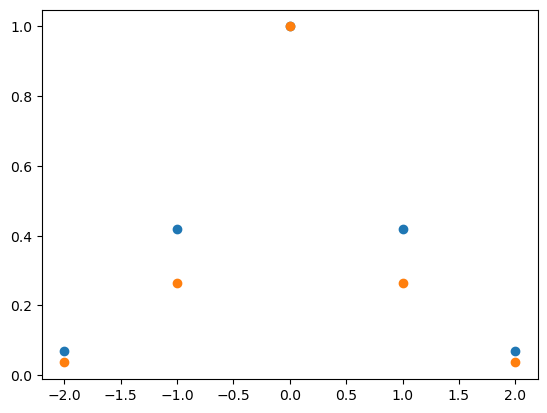

In [10]:
from math import tanh, cosh
from matplotlib import pyplot as plt
def f(x):
    return 1+0.5*tanh(2*x)

h = 10e-3
def ddx(x,f):
    return (f((x+h)/2)-f((x-h)/2))/h

x = [-2,-1,0,1,2]
y = [ddx(i,f) for i in x]

plt.scatter(x,y)
plt.scatter(x,[1/cosh(2*i) for i in x])



In [37]:
from math import exp
from matplotlib import pyplot as plt
import numpy as np
def f(x):
    return 1-exp(-c*x)

xn = [1]
sols = []

c_arr = np.linspace(0,3,30)
for i in range(20):
    c = c_arr[i]
    xn.append(f(xn[i]))
sols.append(xn[20])

sols



[0.0]

[0.033765242898423996, 0.16939530676686765, 0.38069040695840306, 0.6193095930416005, 0.8306046932331645, 0.9662347571015937]


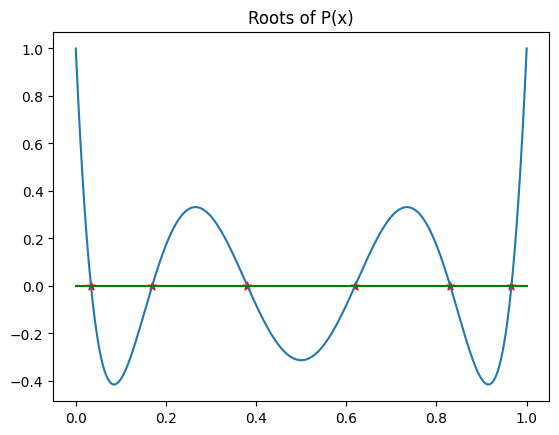

In [82]:
def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def Pp(x):
    return 6*924*x**5 - 5*2772*x**4 + 4*3150*x**3 - 3*1680*x**2 + 2*420*x**1 - 42

### Shows that the roots are ~0.0,0.2,0.4,0.6,0.8,1.0
#x= np.linspace(0,1)
#plt.plot(x,P(x))

initialGuess_array = [0,0.2,0.4,0.6,0.8,1]
sols = []
for j in initialGuess_array:
    xn = [j]
    for i in range(100):
        xn.append(xn[i]-P(xn[i])/Pp(xn[i]))
        root = xn[i]
    sols.append(root)

x= np.linspace(0,1,1000)
plt.plot(x,P(x))
plt.scatter(sols,np.zeros(len(sols)),marker='*',color='r')
plt.plot(x,0*x,color='g')
plt.title(f'Roots of P(x)')
print(sols)


In [96]:
from astropy import constants
from astropy import units as u
r=20000
(constants.G*constants.M_earth)/(r*u.meter)**2 - (constants.G*(7.348e22*u.kilogram))/(3.844e8*u.meter - r*u.meter)**2 - (2.662e-6*(u.second**-1))**2*(r*u.meter)

<Quantity 996500.99996666 m / s2>

In [11]:
from numpy import zeros,loadtxt
from pylab import plot,xlim,show
from cmath import exp,pi

def dft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

y = loadtxt("sunspots.txt",float)

data = [row[1] for row in y]

c = dft(data)
plot(abs(c**2))
xlim([2,40])

show()

FileNotFoundError: sunspots.txt not found.

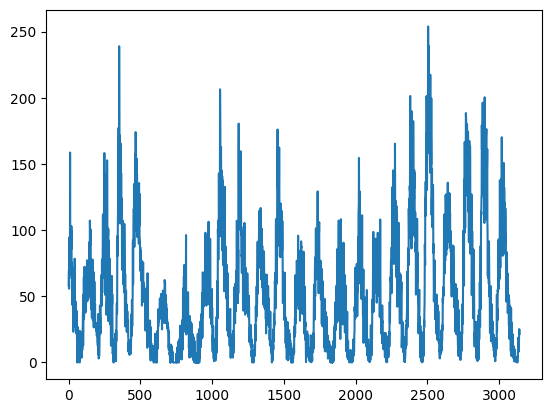

In [19]:
plot(data)

Text(0.5, 1.0, 'Tl atom decay...')

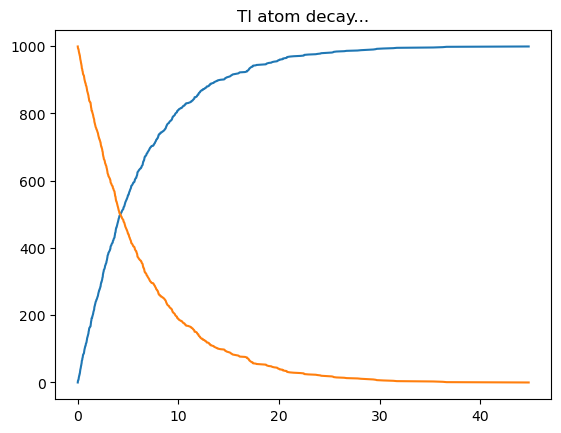

In [21]:
from numpy import log, random, arange
from matplotlib import pyplot as plt
mu = 1/6.075
rng = random.default_rng()
z = rng.random(1000)
x = -1/mu * log(1-z)
atoms = arange(0.0,len(x))

plt.plot(sorted(x),atoms)
plt.plot(sorted(x),sorted(atoms,reverse=True))
plt.title("Tl atom decay...")



In [43]:
from numpy import sin
n = 1000000
x = rng.random(n)
y = rng.random(n)

def I(x):
    return (sin(1/(x*(2-x))))**2

a,b = 0,0
for i in range(len(x)):
    if y[i] > I(x[i]):
        b+=1
    else:
        a+=1

print(a/(a+b))

0.725845


In [44]:
a,b = 0,2

integral = (b-a)/n * np.sum(I(x))
print(integral)

1.4518862353925848


In [2]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.6738e-11          # m^3 kg^-1 s^-2
M = 1.9891e30           # kg
mu = G * M              # GM

r0 = np.array([1.4710e11, 0.0])   # m
v0 = np.array([0.0, 3.0287e4])    # m/s (tangential)

# Time params
dt = 3600.0  # 1 hour in seconds
years = 5    # simulate several revolutions
T_total = years * 365.25 * 24 * 3600
N = int(T_total // dt)

# Storage
r = np.zeros((N+1, 2))
v = np.zeros((N+1, 2))
t = np.zeros(N+1)

r[0] = r0
v[0] = v0

def acc(pos):
    x, y = pos
    rnorm = np.sqrt(x*x + y*y)
    return -mu * pos / (rnorm**3)

# Velocity-Verlet integration
a = acc(r[0])
for n in range(N):
    r[n+1] = r[n] + v[n]*dt + 0.5 * a * dt**2
    a_next = acc(r[n+1])
    v[n+1] = v[n] + 0.5 * (a + a_next) * dt
    a = a_next
    t[n+1] = t[n] + dt

In [11]:
from astropy import constants as c
from matplotlib import pyplot as plt
import numpy as np
x0 = 1.471e11
y0 = 0
vx0,vy0 = 0,3.0287e4
r = np.array([x0,y0,vx0,vy0])
N = 100000
h = 0.01
t = 1

def fgrav(r,t):
    G = c.G.value
    Msun = c.M_sun.value
    dxdt = r[2]
    dydt = r[3]
    dvxdt = -G*Msun*r[0]/(r[0]**2+r[1]**2)**1.5
    dvydt = -G*Msun*r[1]/(r[0]**2+r[1]**2)**1.5
    return np.array([dxdt,dydt,dvxdt,dvydt])

#runge-kutta 4th order
for i in range(N):
    k1 = h*fgrav(r,t) 
    k2 = h*fgrav(r+0.5*k1,t+0.5*h) 
    k3 = h*fgrav(r+0.5*k2,t+0.5*h) 
    k4 = h*fgrav(r+k3,t+h) 
    r += (k1+2*k2+2*k3+k4)/6
    t += h
print(r[0],r[1])



147099996933.406 30286999.789535575


In [16]:
#PDE
from numpy import empty, zeros, max
M = 100
V = 1.0
target = 1e-6
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

#main loop
delta = 1.0
while delta > target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4
    delta = max(abs(phi-phiprime)) 
    phi,phiprime = phiprime,phi


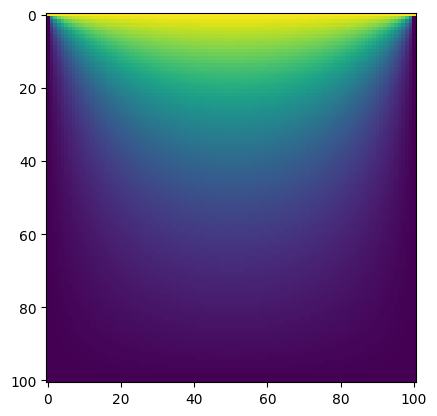

In [17]:
#poisson with two thingies
from numpy import empty, zeros, max
from matplotlib import pyplot as plt
M = 100
V = 1.0
target = 1e-6
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

#main loop
delta = 1.0
while delta > target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4
    delta = max(abs(phi-phiprime)) 
    phi,phiprime = phiprime,phi

plt.imshow(phi)

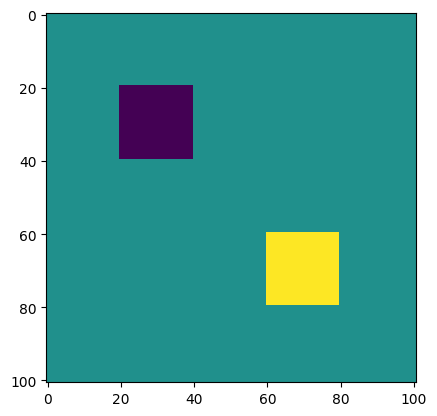

In [33]:
#poisson with two thingies
from numpy import empty, zeros, max
from matplotlib import pyplot as plt
M = 100
V = 1.0
target = 1e-6
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

rho = zeros([M+1, M+1], float)
rho[60:80, 60:80] = 1
rho[20:40, 20:40] = -1
plt.imshow(rho)

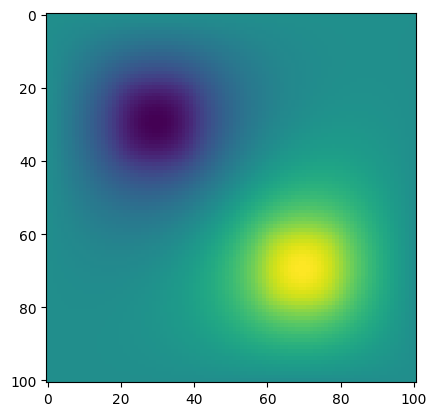

In [34]:
#main loop
delta = 1.0
while delta > target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4 + (rho[i,j] / 4)
    delta = max(abs(phi-phiprime)) 
    phi,phiprime = phiprime,phi

plt.imshow(phi)

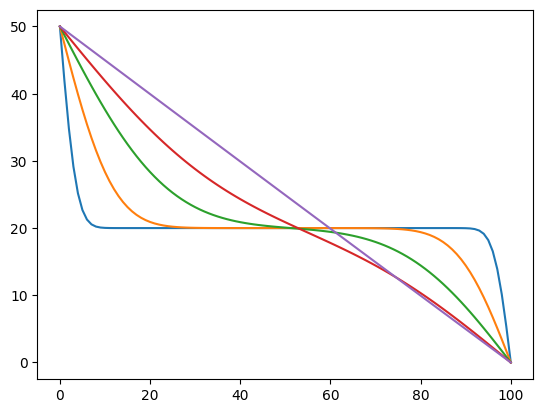

In [40]:
from numpy import empty
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot

L = 0.01 
D = 4.25e-6 #m^-2
N = 100
a = L/N
h = 1e-4

eps = h/1000

Tlo = 0
Tmid = 20
Thi = 50

t = [0.01, 0.1, 0.4, 1.0, 10.0]
tend = t[-1] + eps

T = empty(N+1, float)
Tp = empty(N+1, float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid

t0 = 0.0
c = h * D / (a**2)

while t0 < tend:
    for i in range(1, N):
        Tp[i] = T[i] + c * (T[i+1] + T[i-1] - 2 * T[i])
    T, Tp = Tp, T
    t0 += h

    if any(abs(t0 - ti) < eps for ti in t):
        plot(T)

plt.show()


/var/folders/1z/wc5b1c9517s8qg8jwgl6k1_w0000gn/T/ipykernel_81664/588754166.py:38: RuntimeWarning: overflow encountered in scalar multiply
  Tp[i] = T[i] + c * (T[i+1] + T[i-1] - 2 * T[i])
/var/folders/1z/wc5b1c9517s8qg8jwgl6k1_w0000gn/T/ipykernel_81664/588754166.py:38: RuntimeWarning: invalid value encountered in scalar add
  Tp[i] = T[i] + c * (T[i+1] + T[i-1] - 2 * T[i])
/var/folders/1z/wc5b1c9517s8qg8jwgl6k1_w0000gn/T/ipykernel_81664/588754166.py:38: RuntimeWarning: overflow encountered in scalar subtract
  Tp[i] = T[i] + c * (T[i+1] + T[i-1] - 2 * T[i])


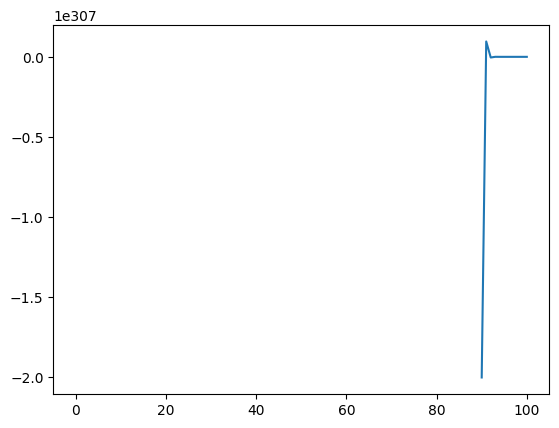

In [50]:
from numpy import empty, sin
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot

L = 0.01 
D = 0.1 #m^-2
N = 400
a = L/N
h = 1e-4
tau = 365

eps = h/1000

Tlo = 10
Thi = 20
Tmid = 10

t = [0.01, 0.1, 0.4, 1.0, 10.0] * 365
tend = t[-1] + eps

T = empty(N+1, float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid

Tp = empty(N+1, float)
Tp[0] = Thi
Tp[N] = Tlo
T[1:N] = Tmid

t0 = 0.0
c = h * D / (a**2)

while t0 < tend:
    T[0] = 10 + 12 * sin(2*3.14159 * t0 / tau)
    T[N] = 11  
    for i in range(1, N):

        Tp[i] = T[i] + c * (T[i+1] + T[i-1] - 2 * T[i])
    T, Tp = Tp, T
    t0 += h

    if any(abs(t0 - ti) < eps for ti in t):
        plot(T)

plt.show()


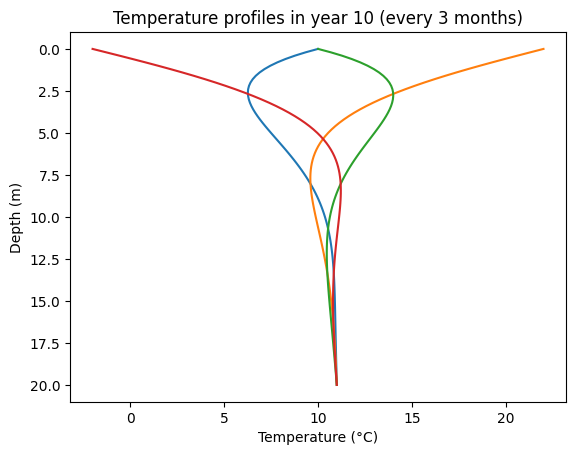

In [51]:
from numpy import empty, sin, pi, linspace
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot

# --- parameters (changed) ---
L = 20.0                   # CHANGED: depth to 20 m
D = 0.1                    # CHANGED: m^2/day
N = 100
a = L / N
h = 0.01                   # CHANGED: time step (days) – stable for FTCS here

eps = h / 1000

# seasonal surface temperature: T(0,t) = A + B sin(2π t / τ)
A = 10.0                   # CHANGED
B = 12.0                   # CHANGED
tau = 365.0                # CHANGED (days)
Tdeep = 11.0               # CHANGED: fixed 20 m temperature

# sample times: year 10 every 3 months (after 9 years of settling)
t = [9*tau + k*(tau/4.0) for k in range(4)]    # CHANGED
tend = t[-1] + eps

# --- initial condition (mostly unchanged) ---
T = empty(N+1, float)
Tp = empty(N+1, float)
T[0]  = A                                   # CHANGED: start surface at mean value
T[N]  = Tdeep                               # CHANGED: deep boundary
T[1:N] = 10.0                               # CHANGED: 10°C everywhere else initially

t0 = 0.0
c = h * D / (a**2)

x = linspace(0.0, L, N+1)                   # CHANGED: depth array for plotting

# --- time stepping (minimal edits) ---
while t0 < tend:
    # CHANGED: apply boundary conditions at current time
    T[0] = A + B * sin(2.0 * pi * t0 / tau)   # time-varying surface
    T[N] = Tdeep                               # fixed bottom

    for i in range(1, N):
        Tp[i] = T[i] + c * (T[i+1] + T[i-1] - 2 * T[i])
    T, Tp = Tp, T
    t0 += h

    if any(abs(t0 - ti) < eps for ti in t):
        plot(T, x)                           # CHANGED: plot vs depth

plt.gca().invert_yaxis()                     # CHANGED: depth increases downward
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("Temperature profiles in year 10 (every 3 months)")
plt.show()
